In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def skew_handling(df):
        
    '''Separates the numeric and categorical columns,
    then separates the discrete and continuous columns
    from the numeric columns'''
    
    num_cols = []
    cat_cols = []

    for i in df.columns:
        if df[i].dtype in ['int64','float64']:
            num_cols.append(i)
        else:
            cat_cols.append(i)
    
    disc_num_cols = []
    cont_num_cols = []
    
    for j in num_cols:
        if df[j].dtype != 'float64':
            disc_num_cols.append(j)
        else:
            cont_num_cols.append(j)
            
    '''Transforms the continuous numeric columns
    and adds new transformed columns at the end
    of the dataframe'''
    
    k = [l+'_transformed' for l in cont_num_cols]
    
    for m,n in zip(cont_num_cols,k):
        o,p = stats.yeojohnson(df[m])
        df[n] = o
        
    return df

In [3]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data1 = sns.load_dataset('iris')
data1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

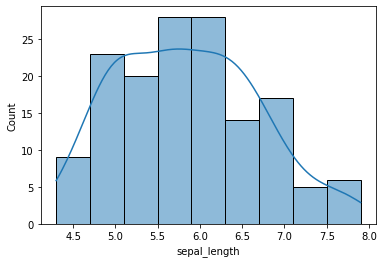

In [50]:
sns.histplot(data1['sepal_length'],kde=True)

In [51]:
skew_handling(data1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_transformed,sepal_width_transformed,petal_length_transformed,petal_width_transformed
0,5.1,3.5,1.4,0.2,setosa,1.371586,1.549156,1.467298,0.197033
1,4.9,3.0,1.4,0.2,setosa,1.352837,1.424530,1.467298,0.197033
2,4.7,3.2,1.3,0.2,setosa,1.333229,1.476085,1.359008,0.197033
3,4.6,3.1,1.5,0.2,setosa,1.323081,1.450609,1.576010,0.197033
4,5.0,3.6,1.4,0.2,setosa,1.362315,1.572475,1.467298,0.197033
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.497136,1.424530,5.808069,2.055647
146,6.3,2.5,5.0,1.9,virginica,1.469206,1.283932,5.571349,1.721655
147,6.5,3.0,5.2,2.0,virginica,1.483417,1.424530,5.808069,1.805806
148,6.2,3.4,5.4,2.3,virginica,1.461906,1.525333,6.045502,2.055647


<AxesSubplot:xlabel='sepal_length_transformed', ylabel='Count'>

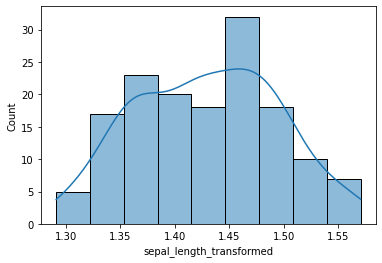

In [53]:
sns.histplot(data1['sepal_length_transformed'],kde=True)

In [11]:
data1

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_transformed,sepal_width_transformed,petal_length_transformed,petal_width_transformed
0,5.1,3.5,1.4,0.2,setosa,1.371586,1.549156,1.467298,0.197033
1,4.9,3.0,1.4,0.2,setosa,1.352837,1.424530,1.467298,0.197033
2,4.7,3.2,1.3,0.2,setosa,1.333229,1.476085,1.359008,0.197033
3,4.6,3.1,1.5,0.2,setosa,1.323081,1.450609,1.576010,0.197033
4,5.0,3.6,1.4,0.2,setosa,1.362315,1.572475,1.467298,0.197033
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.497136,1.424530,5.808069,2.055647
146,6.3,2.5,5.0,1.9,virginica,1.469206,1.283932,5.571349,1.721655
147,6.5,3.0,5.2,2.0,virginica,1.483417,1.424530,5.808069,1.805806
148,6.2,3.4,5.4,2.3,virginica,1.461906,1.525333,6.045502,2.055647


In [5]:
def skew_handling2(df):
        
    '''Separates the numeric and categorical columns,
    then separates the discrete and continuous columns
    from the numeric columns'''
    
    num_cols = []
    cat_cols = []

    for i in df.columns:
        if df[i].dtype in ['int64','float64']:
            num_cols.append(i)
        else:
            cat_cols.append(i)
    
    disc_num_cols = []
    cont_num_cols = []
    
        
    for j in num_cols:
        if df[j].nunique() <= 20:
            disc_num_cols.append(j)
        else:
            cont_num_cols.append(j)
            
    '''Transforms the continuous numeric columns
    and adds new transformed columns at the end
    of the dataframe'''
    
    k = [l+'_transformed' for l in cont_num_cols]
    
    for m,n in zip(cont_num_cols,k):
        o,p = stats.yeojohnson(df[m])
        df[n] = o
        
    return df

In [8]:
stats.yeojohnson(data1['sepal_length'])

(array([1.37158622, 1.35283713, 1.33322896, 1.32308066, 1.3623149 ,
        1.39823725, 1.32308066, 1.3623149 , 1.3020468 , 1.35283713,
        1.39823725, 1.34314472, 1.34314472, 1.2911399 , 1.43130947,
        1.42328684, 1.39823725, 1.37158622, 1.42328684, 1.37158622,
        1.39823725, 1.37158622, 1.32308066, 1.37158622, 1.34314472,
        1.3623149 , 1.3623149 , 1.38065888, 1.38065888, 1.33322896,
        1.34314472, 1.39823725, 1.38065888, 1.40675655, 1.35283713,
        1.3623149 , 1.40675655, 1.35283713, 1.3020468 , 1.37158622,
        1.3623149 , 1.31269005, 1.3020468 , 1.3623149 , 1.37158622,
        1.34314472, 1.37158622, 1.32308066, 1.38954023, 1.3623149 ,
        1.51685471, 1.47637511, 1.51039188, 1.40675655, 1.48341712,
        1.42328684, 1.46920623, 1.35283713, 1.49033616, 1.38065888,
        1.3623149 , 1.43917772, 1.44689673, 1.4544714 , 1.41510443,
        1.49713595, 1.41510443, 1.43130947, 1.46190641, 1.41510443,
        1.43917772, 1.4544714 , 1.46920623, 1.45

In [15]:
skew_handling2(data1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_transformed,sepal_width_transformed,petal_length_transformed,petal_width_transformed
0,5.1,3.5,1.4,0.2,setosa,1.371586,1.549156,1.467298,0.197033
1,4.9,3.0,1.4,0.2,setosa,1.352837,1.424530,1.467298,0.197033
2,4.7,3.2,1.3,0.2,setosa,1.333229,1.476085,1.359008,0.197033
3,4.6,3.1,1.5,0.2,setosa,1.323081,1.450609,1.576010,0.197033
4,5.0,3.6,1.4,0.2,setosa,1.362315,1.572475,1.467298,0.197033
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.497136,1.424530,5.808069,2.055647
146,6.3,2.5,5.0,1.9,virginica,1.469206,1.283932,5.571349,1.721655
147,6.5,3.0,5.2,2.0,virginica,1.483417,1.424530,5.808069,1.805806
148,6.2,3.4,5.4,2.3,virginica,1.461906,1.525333,6.045502,2.055647


In [16]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:ylabel='Frequency'>

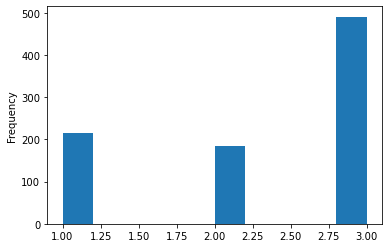

In [20]:
data['pclass'].plot.hist()

<AxesSubplot:ylabel='Density'>

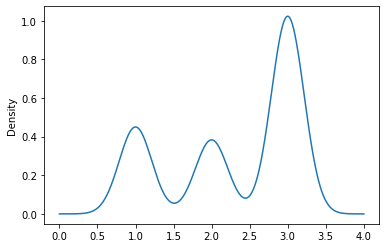

In [35]:
data['pclass'].plot.kde()

In [23]:
x,y = stats.yeojohnson(data['pclass'])

<AxesSubplot:ylabel='Frequency'>

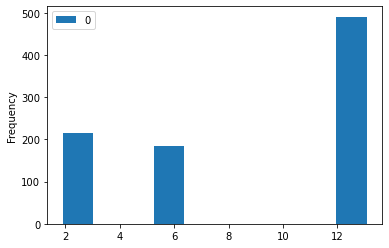

In [25]:
pd.DataFrame(x).plot.hist()

<AxesSubplot:ylabel='Density'>

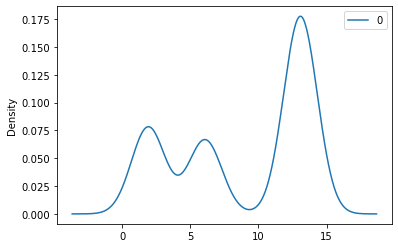

In [37]:
pd.DataFrame(x).plot.kde()

In [28]:
pd.DataFrame(x)

,0
0,13.082161
1,1.905985
2,13.082161
3,1.905985
4,13.082161
...,...
886,6.074735
887,1.905985
888,13.082161
889,1.905985


In [32]:
pd.Series(x).unique()

array([13.08216057,  1.90598506,  6.07473548])

In [38]:
pd.DataFrame(zip(data['pclass'],x),columns=['Actual','Transformed'])

,Actual,Transformed
0,3,13.082161
1,1,1.905985
2,3,13.082161
3,1,1.905985
4,3,13.082161
...,...,...
886,2,6.074735
887,1,1.905985
888,3,13.082161
889,1,1.905985


In [43]:
v,w = stats.yeojohnson(data['age'])

In [44]:
pd.DataFrame(zip(data['age'],v),columns=['Actual','Transformed'])

,Actual,Transformed
0,22.0,4.062097e+10
1,38.0,3.562235e+12
2,26.0,1.580212e+11
3,35.0,1.808062e+12
4,35.0,1.808062e+12
...,...,...
886,27.0,2.150436e+11
887,19.0,1.243111e+10
888,NaN,NaN
889,26.0,1.580212e+11


In [45]:
data['age'].skew()

0.38910778230082704

In [46]:
data['pclass'].skew()

-0.6305479068752845

In [47]:
data['pclass'].nunique()

3

In [48]:
data['age'].min()

0.42

In [55]:
data.age.min()

0.42

In [56]:
data.age.max()

80.0

In [57]:
data.pclass.unique()

array([3, 1, 2], dtype=int64)

In [58]:
data.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [6]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
skew_handling2(data)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_transformed,fare_transformed
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,4.062097e+10,1.906724
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3.562235e+12,3.497640
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.580212e+11,1.970459
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.808062e+12,3.304258
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.808062e+12,1.981680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,2.150436e+11,2.326029
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1.243111e+10,2.916885
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,2.745246
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1.580212e+11,2.916885
